In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns;
import scipy
import os

matplotlib.rcParams['figure.dpi']= 200

colors = sns.color_palette("hls", n_colors=11)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


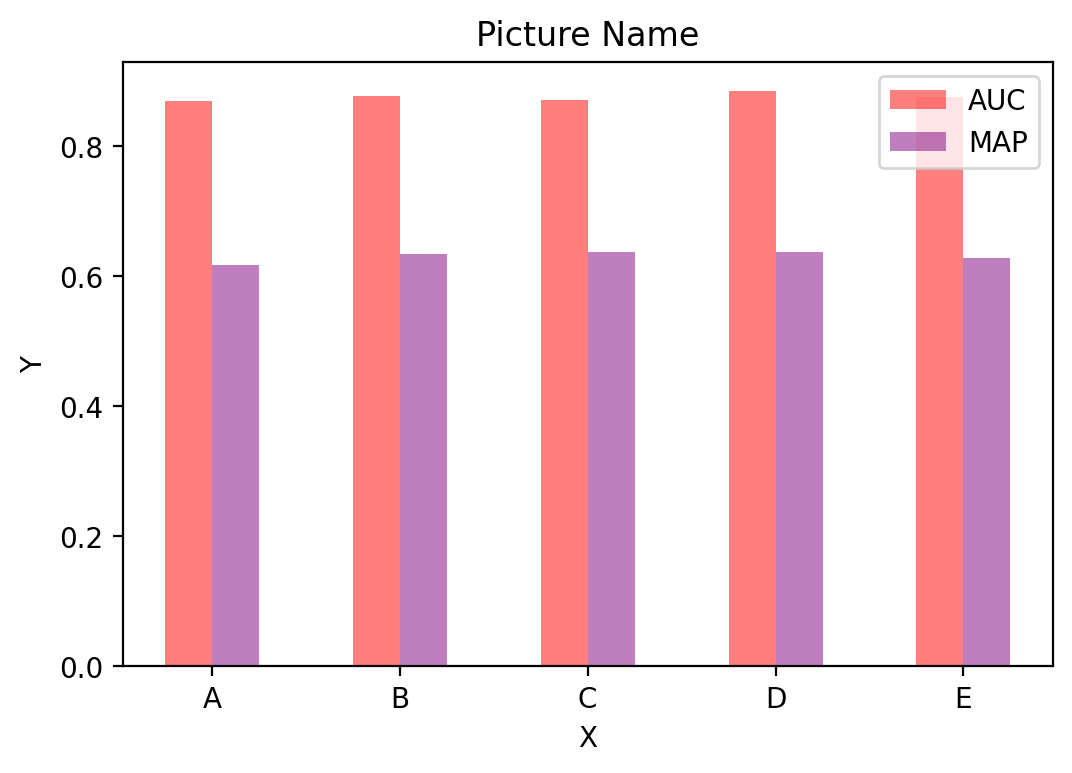

In [4]:
#柱高信息
Y = [0.87,0.878,0.872,0.885,0.876]
Y1 = [0.618,0.634,0.637,0.638,0.629]
X = np.arange(len(Y))

bar_width = 0.25
tick_label = ['A','B','C','D','E']
 
#绘制柱状图    
plt.bar(X, Y, bar_width, align="center", color="red", label="AUC", alpha=0.5)
plt.bar(X+bar_width, Y1, bar_width, color="purple", align="center", \
        label="MAP", alpha=0.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title('Picture Name')

plt.xticks(X+bar_width/2, tick_label)
#显示图例
plt.legend()

In [5]:
'''
Read a json file, return a dict.
'''
def get_data(filename = ''):
    f = './data/' + filename + '.json'
    if not os.path.isfile(f):
        print(filename + '.json', 'does not exist.')
        return None
    with open(f, 'r') as infile:
        d = json.load(infile)
    return d

In [6]:
d_gpu = get_data('pytorch_gpu')
d_npu = get_data('pytorch_npu')

In [33]:
def throughput_plot(a_labels, a_perf, b_labels, b_perf):
    a_eps = []
    b_eps = []
    speed_up = []
    l = []
    for i in range(len(a_labels)):
        label = a_labels[i]
        if not "backward" in label:
            continue
        if not label in b_labels:
            continue
        ind = b_labels.index(label)
        if a_perf[i] == 0.0 or b_perf[ind] == 0.0:
            continue
        a_eps.append(a_perf[i])
        b_eps.append(b_perf[ind])
        speed_up.append(a_perf[i]/b_perf[ind])
        label = label.replace('backward-', '')
        l.append(label)
    print('length of speedups', len(speed_up))
    print(f"max speedup: {max(speed_up)} label: {l[np.argmax(speed_up)]}")
    print(f"min speedup: {min(speed_up)} label: {l[np.argmin(speed_up)]}")
    X = np.arange(len(a_eps))
    plt.bar(X, a_eps, bar_width, align="center", color="red", label="NPU", alpha=0.5)
    plt.bar(X+bar_width, b_eps, bar_width, color="purple", align="center", \
        label="GPU", alpha=0.5)
    
    plt.xticks(X+bar_width/2, l)
    plt.legend()

length of speedups 6
max speedup: 2.4466954449094365 label: resnet101-bs_256
min speedup: 0.7464446348854273 label: resnet101-bs_64


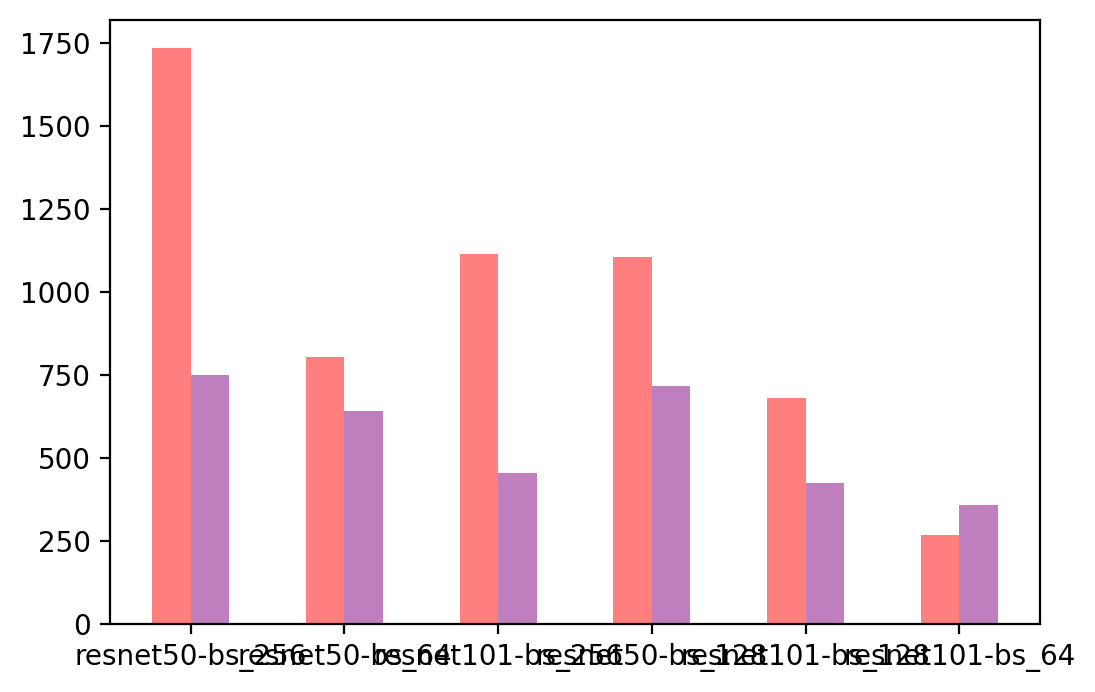

In [34]:
throughput_plot(d_npu['labels'], d_npu['example_per_sec'], d_gpu['labels'], d_gpu['example_per_sec'])